# Movie Recommender System

### Initialization


#### Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [5]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [7]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Exploratory Data Analysis

#### Yearwise Analysis

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_18600\3457501272.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].axhline(y = average[1], color = 'r', linestyle = '-',label='Average')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_18600\3457501272.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axhline(y = average[2], color = 'r', linestyle = '-',label='Average')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_18600\3457501272.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

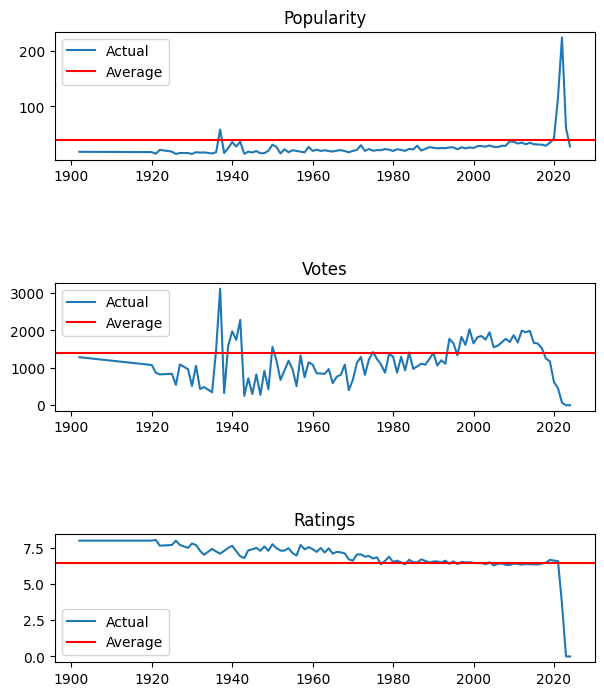

In [66]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], color = 'r', linestyle = '-',label='Average')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], color = 'r', linestyle = '-',label='Average')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], color = 'r', linestyle = '-',label='Average')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

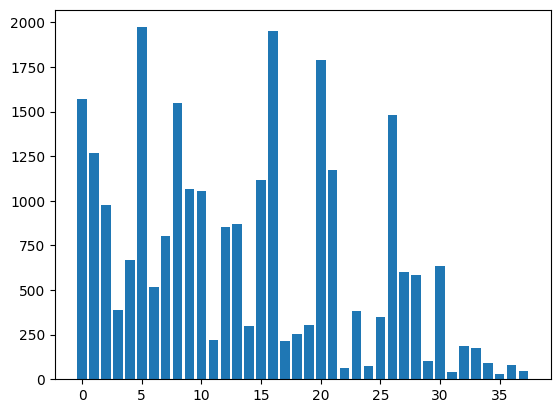

Maximum Genre and Value:  Thriller & 1973
Minimum Genre and Value:  Documentary & 31


In [100]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")